# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de convusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [1]:
import sys,os
sys.path.append(os.getcwd())
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 

In [2]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [3]:
import pandas as pd

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [4]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

In [5]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

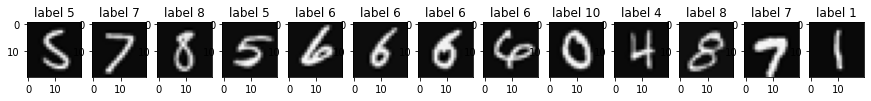

In [6]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de convusion

In [8]:
def mat_con(eteq,pred):
    mat=np.zeros((11,11))
   
    for label,predicted in zip(eteq,pred):
        mat[label,predicted]+=1
    mat = np.delete(mat,0,0)
    
    return np.delete(mat,0,1)        

In [9]:
def afficher_matrice(Ytt,mat):
    val = np.mat(mat) 
    classnames = list(set(Ytt))
    df_cm = pd.DataFrame(val, index=classnames, columns=classnames, )
    print(df_cm)

- Mesures

In [10]:
def mesures(mat_confusion):
    FP = mat_confusion.sum(axis=0) - np.diag(mat_confusion)  
    FN = mat_confusion.sum(axis=1) - np.diag(mat_confusion)
    TP = np.diag(mat_confusion)
    TN = mat_confusion.sum() - (FP + FN + TP)

    return FP,FN,TP,TN

- Rappel


In [11]:
def rappel(mat_conf):
    mat=np.zeros(10)
    
    for i in range(10):
        mat[i]=mat_conf[i,i]/(sum(mat_conf[i]))
    np.delete(mat,0)
    return mat

In [12]:
def rappel2(mat_conf):
    FP,FN,TP,TN = mesures(mat_conf)
    return TP/(TP+FN)

- Précision

In [13]:
def precision(mat_conf):
    mat=np.zeros(10)
    sumC = np.sum(mat_conf, axis=0)
    for i in range(10):
        mat[i]=mat_conf[i,i]/sumC[i]
    np.delete(mat,0)
    return mat

In [14]:
def precision2(mat_conf):
    FP,FN,TP,TN = mesures(mat_conf)
    return TP/(TP+FP)


- Taux de FP

In [15]:
def tauxFP(mat_conf):
    mat=np.zeros(10)
    for i in range(10):
        mat[i]=(sum(mat_conf[i]) - mat_conf[i,i])/(sum(mat_conf[i]))
    return mat

In [16]:
def tauxFP2(mat_conf):
    FP,FN,TP,TN = mesures(mat_conf)
    return FP/(FP+TN)

- Spécificité

In [17]:
def specificite(mat_conf):
    FP,FN,TP,TN = mesures(mat_conf)
    return TN/(TN+FP)

- Accuracy

In [18]:
def accuracy(mat_conf):
    acc = np.diag(mat_conf)/mat_conf.sum()
    return acc.sum()

In [19]:
def afficher_vect(Ytt,l):
#     val = np.mat(l) 
    classnames = list(set(Ytt))
    df_cm = pd.DataFrame(l, index=classnames, )
    print(df_cm)

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [20]:
tRatio=2/3
ttRatio=1/3
# implementer la division

In [21]:
# redéfintion des étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.3)

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

Le choix de k est très critique - Une petite valeur de k signifie que le bruit aura une plus grande influence sur le résultat et conduit à des limites de décision instables. Une grande valeur rend le calcul coûteux.

In [22]:
def KPP(x,X, Y,k):
    # Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt
    distances = []
    
    for data, label in zip(X,Y):
        sum = 0
        for x0,x1 in zip(x,data):
            sum += (x0-x1)**2
        distances.append((label,sum**0.5))
    distances.sort(key = lambda distance : distance[1], reverse = False)
    labels = [item[0] for item in distances[:k]]
    common_label = max(labels, key = labels.count)
    return common_label
    

In [23]:
y_predk1 = [KPP(x,Xt,Yt,1) for x in Xtt]

In [24]:
y_predk2 = [KPP(x,Xt,Yt,2) for x in Xtt]

In [25]:
y_predk3 = [KPP(x,Xt,Yt,3) for x in Xtt]

In [26]:
y_predk4 = [KPP(x,Xt,Yt,4) for x in Xtt]

In [27]:
y_predk5 = [KPP(x,Xt,Yt,5) for x in Xtt]

In [28]:
df = pd.DataFrame()
df['Ytt'] = Ytt
df['y_predk1'] = y_predk1
df

,Ytt,y_predk1
0,10,10
1,7,7
2,9,9
3,9,2
4,1,1
...,...,...
1495,9,9
1496,9,9
1497,2,2
1498,5,5


# Méthode 1: MVS
Machine à Vecteurs de Support

In [37]:
#Créer le modèle
model= svm.SVC(kernel='linear',probability=True) 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [38]:
pred_mvs = model.predict(Xtt)

In [39]:
dec_mvs = model.predict_proba(Xtt)

In [40]:
dec_mvs.shape

(1500, 10)

In [41]:
from sklearn.metrics import roc_curve,auc

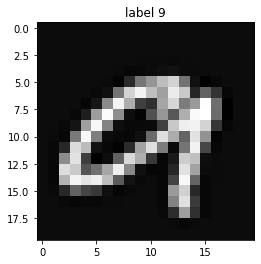

In [42]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


In [119]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred_ar_dc = model.predict(Xtt)

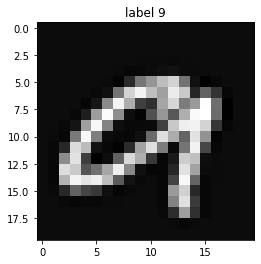

In [44]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [45]:
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.3)
model.fit(Xt, Yt)

MLPClassifier()

In [46]:
yp_rn = model.predict(Xtt)

In [47]:
# Choisir un image de test 
c=1

In [48]:
model.predict([Xtt[c,:]])

array([6])

In [49]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

array([[1.02724932e-07, 1.27957462e-07, 1.32123825e-24, 1.21612923e-10,
        5.76244110e-15, 9.99999769e-01, 6.37183080e-11, 4.54101968e-23,
        1.00892727e-15, 1.21340541e-18]])

Afficher l'image testée

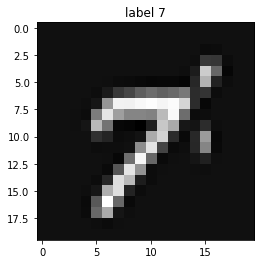

In [50]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Appliquer les métriques implementées pour voir le résultat

# Méthode 0: K- Plus Proches Voisins

- Avec K=1

In [136]:
mat = mat_con(Ytt,y_predk1)
afficher_matrice(Ytt,mat)

       1      2      3      4      5      6      7      8      9      10
1   148.0    2.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
2     0.0  141.0    3.0    0.0    0.0    0.0    2.0    1.0    0.0    1.0
3     1.0    2.0  144.0    0.0    3.0    0.0    1.0    0.0    0.0    0.0
4     2.0    1.0    0.0  126.0    0.0    2.0    0.0    0.0    7.0    0.0
5     0.0    0.0    5.0    1.0  145.0    2.0    0.0    1.0    3.0    1.0
6     1.0    0.0    0.0    0.0    3.0  140.0    0.0    0.0    0.0    1.0
7     3.0    1.0    0.0    1.0    0.0    0.0  146.0    0.0    1.0    0.0
8     0.0    0.0    4.0    0.0    2.0    1.0    0.0  164.0    0.0    0.0
9     1.0    1.0    0.0    6.0    2.0    0.0    5.0    0.0  136.0    2.0
10    1.0    0.0    0.0    0.0    0.0    2.0    0.0    0.0    0.0  130.0


In [137]:
r= rappel(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.980132
2   0.952703
3   0.953642
4   0.913043
5   0.917722
6   0.965517
7   0.960526
8   0.959064
9   0.888889
10  0.977444
Rappel moy :     0.9469


In [138]:
p= precision(mat)
print('Precision:')
afficher_vect(Ytt,p)

print('Precision moy : {:10.4f}'.format(p.sum()/len(p)))

Precision:
           0
1   0.942675
2   0.952703
3   0.917197
4   0.940299
5   0.935484
6   0.952381
7   0.948052
8   0.987952
9   0.925170
10  0.962963
Precision moy :     0.9465


In [139]:
tfp= tauxFP(mat)
print('TauxFP:')
afficher_vect(Ytt,tfp)
print('tauxFP moy : {:10.4f}'.format(tfp.sum()/len(tfp)))

TauxFP:
           0
1   0.019868
2   0.047297
3   0.046358
4   0.086957
5   0.082278
6   0.034483
7   0.039474
8   0.040936
9   0.111111
10  0.022556
tauxFP moy :     0.0531


In [140]:
s= specificite(mat)
print('Specificité:')
afficher_vect(Ytt,s)

print('specificite moy : {:10.4f}'.format(s.sum()/s.size))

Specificité:
           0
1   0.993328
2   0.994822
3   0.990363
4   0.994126
5   0.992548
6   0.994834
7   0.994065
8   0.998495
9   0.991834
10  0.996342
specificite moy :     0.9941


In [141]:
acc1 = accuracy(mat)
score= []
score.append(acc1)
print('accuracy : {:10.4f}'.format(acc1))

accuracy :     0.9467


- Avec K=2

In [142]:
mat = mat_con(Ytt,y_predk2)
print(mat)

[[148.   2.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 141.   3.   0.   0.   0.   2.   1.   0.   1.]
 [  1.   2. 144.   0.   3.   0.   1.   0.   0.   0.]
 [  2.   1.   0. 126.   0.   2.   0.   0.   7.   0.]
 [  0.   0.   5.   1. 145.   2.   0.   1.   3.   1.]
 [  1.   0.   0.   0.   3. 140.   0.   0.   0.   1.]
 [  3.   1.   0.   1.   0.   0. 146.   0.   1.   0.]
 [  0.   0.   4.   0.   2.   1.   0. 164.   0.   0.]
 [  1.   1.   0.   6.   2.   0.   5.   0. 136.   2.]
 [  1.   0.   0.   0.   0.   2.   0.   0.   0. 130.]]


In [143]:
r= rappel(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.980132
2   0.952703
3   0.953642
4   0.913043
5   0.917722
6   0.965517
7   0.960526
8   0.959064
9   0.888889
10  0.977444
Rappel moy :     0.9469


In [144]:
p= precision(mat)
print('Precision:')
afficher_vect(Ytt,p)

print('Precision moy : {:10.4f}'.format(p.sum()/len(p)))

Precision:
           0
1   0.942675
2   0.952703
3   0.917197
4   0.940299
5   0.935484
6   0.952381
7   0.948052
8   0.987952
9   0.925170
10  0.962963
Precision moy :     0.9465


In [145]:
tfp= tauxFP(mat)
print('TauxFP:')
afficher_vect(Ytt,tfp)
print('tauxFP moy : {:10.4f}'.format(tfp.sum()/len(tfp)))

TauxFP:
           0
1   0.019868
2   0.047297
3   0.046358
4   0.086957
5   0.082278
6   0.034483
7   0.039474
8   0.040936
9   0.111111
10  0.022556
tauxFP moy :     0.0531


In [146]:
s= specificite(mat)
print('Specificité:')
afficher_vect(Ytt,s)

print('specificite moy : {:10.4f}'.format(s.sum()/s.size))

Specificité:
           0
1   0.993328
2   0.994822
3   0.990363
4   0.994126
5   0.992548
6   0.994834
7   0.994065
8   0.998495
9   0.991834
10  0.996342
specificite moy :     0.9941


In [147]:
acc2 = accuracy(mat)
score.append(acc2)
print('accuracy : {:10.4f}'.format(acc2))

accuracy :     0.9467


- Avec K=3

In [148]:
mat = mat_con(Ytt,y_predk3)
print(mat)

[[148.   2.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  2. 141.   1.   0.   0.   0.   1.   1.   1.   1.]
 [  1.   1. 144.   0.   3.   0.   2.   0.   0.   0.]
 [  3.   0.   0. 129.   0.   2.   0.   0.   4.   0.]
 [  0.   0.   2.   1. 149.   2.   0.   0.   3.   1.]
 [  1.   0.   0.   0.   2. 141.   0.   0.   0.   1.]
 [  2.   1.   0.   0.   0.   0. 146.   0.   3.   0.]
 [  0.   0.   4.   0.   4.   1.   0. 159.   3.   0.]
 [  1.   2.   1.   5.   0.   2.   4.   0. 138.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0. 132.]]


In [149]:
r= rappel(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.980132
2   0.952703
3   0.953642
4   0.934783
5   0.943038
6   0.972414
7   0.960526
8   0.929825
9   0.901961
10  0.992481
Rappel moy :     0.9522


In [150]:
p= precision(mat)
print('Precision:')
afficher_vect(Ytt,p)

print('Precision moy : {:10.4f}'.format(p.sum()/len(p)))

Precision:
           0
1   0.930818
2   0.959184
3   0.941176
4   0.955556
5   0.943038
6   0.952703
7   0.954248
8   0.993750
9   0.907895
10  0.977778
Precision moy :     0.9516


In [151]:
tfp= tauxFP(mat)
print('TauxFP:')
afficher_vect(Ytt,tfp)
print('tauxFP moy : {:10.4f}'.format(tfp.sum()/len(tfp)))

TauxFP:
           0
1   0.019868
2   0.047297
3   0.046358
4   0.065217
5   0.056962
6   0.027586
7   0.039474
8   0.070175
9   0.098039
10  0.007519
tauxFP moy :     0.0478


In [152]:
s= specificite(mat)
print('Specificité:')
afficher_vect(Ytt,s)

print('specificite moy : {:10.4f}'.format(s.sum()/s.size))

Specificité:
           0
1   0.991846
2   0.995562
3   0.993328
4   0.995595
5   0.993294
6   0.994834
7   0.994807
8   0.999248
9   0.989607
10  0.997805
specificite moy :     0.9946


In [153]:
acc3 = accuracy(mat)
score.append(acc3)
print('accuracy : {:10.4f}'.format(acc3))

accuracy :     0.9513


- Avec K=4

In [154]:
mat = mat_con(Ytt,y_predk4)
print(mat)

[[149.   1.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  1. 140.   2.   0.   0.   0.   2.   1.   0.   2.]
 [  0.   1. 145.   0.   3.   0.   2.   0.   0.   0.]
 [  3.   0.   0. 128.   0.   2.   0.   0.   5.   0.]
 [  0.   0.   4.   0. 148.   2.   0.   0.   3.   1.]
 [  1.   0.   0.   0.   2. 141.   0.   0.   0.   1.]
 [  2.   0.   0.   1.   0.   0. 147.   0.   2.   0.]
 [  0.   0.   2.   0.   2.   1.   0. 161.   3.   2.]
 [  1.   2.   1.   4.   0.   1.   5.   0. 138.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0. 132.]]


In [155]:
r= rappel(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.986755
2   0.945946
3   0.960265
4   0.927536
5   0.936709
6   0.972414
7   0.967105
8   0.941520
9   0.901961
10  0.992481
Rappel moy :     0.9533


In [156]:
p= precision(mat)
print('Precision:')
afficher_vect(Ytt,p)

print('Precision moy : {:10.4f}'.format(p.sum()/len(p)))

Precision:
           0
1   0.943038
2   0.972222
3   0.935484
4   0.962406
5   0.954839
6   0.959184
7   0.942308
8   0.993827
9   0.913907
10  0.949640
Precision moy :     0.9527


In [157]:
tfp= tauxFP(mat)
print('TauxFP:')
afficher_vect(Ytt,tfp)
print('tauxFP moy : {:10.4f}'.format(tfp.sum()/len(tfp)))

TauxFP:
           0
1   0.013245
2   0.054054
3   0.039735
4   0.072464
5   0.063291
6   0.027586
7   0.032895
8   0.058480
9   0.098039
10  0.007519
tauxFP moy :     0.0467


In [158]:
s= specificite(mat)
print('Specificité:')
afficher_vect(Ytt,s)

print('specificite moy : {:10.4f}'.format(s.sum()/s.size))

Specificité:
           0
1   0.993328
2   0.997041
3   0.992587
4   0.996329
5   0.994784
6   0.995572
7   0.993323
8   0.999248
9   0.990349
10  0.994879
specificite moy :     0.9947


In [159]:
acc4 = accuracy(mat)
score.append(acc4)
print('accuracy : {:10.4f}'.format(acc4))

accuracy :     0.9527


- Avec K=5

In [160]:
mat = mat_con(Ytt,y_predk5)
print(mat)

[[149.   0.   1.   1.   0.   0.   0.   0.   0.   0.]
 [  1. 140.   1.   0.   0.   1.   2.   1.   0.   2.]
 [  0.   2. 142.   0.   3.   0.   2.   1.   1.   0.]
 [  3.   0.   0. 128.   0.   3.   0.   0.   4.   0.]
 [  0.   0.   4.   1. 148.   1.   0.   0.   3.   1.]
 [  1.   0.   0.   0.   2. 141.   0.   0.   0.   1.]
 [  5.   0.   0.   0.   0.   0. 144.   0.   3.   0.]
 [  0.   0.   2.   0.   3.   1.   0. 161.   4.   0.]
 [  1.   2.   1.   4.   0.   2.   5.   0. 138.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0. 132.]]


In [161]:
r= rappel(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.986755
2   0.945946
3   0.940397
4   0.927536
5   0.936709
6   0.972414
7   0.947368
8   0.941520
9   0.901961
10  0.992481
Rappel moy :     0.9493


In [162]:
p= precision(mat)
print('Precision:')
afficher_vect(Ytt,p)
print('Precision moy : {:10.4f}'.format(p.sum()/len(p)))

Precision:
           0
1   0.925466
2   0.972222
3   0.940397
4   0.955224
5   0.948718
6   0.946309
7   0.941176
8   0.987730
9   0.901961
10  0.970588
Precision moy :     0.9490


In [163]:
tfp= tauxFP(mat)
print('TauxFP:')
afficher_vect(Ytt,tfp)
print('tauxFP moy : {:10.4f}'.format(tfp.sum()/len(tfp)))

TauxFP:
           0
1   0.013245
2   0.054054
3   0.059603
4   0.072464
5   0.063291
6   0.027586
7   0.052632
8   0.058480
9   0.098039
10  0.007519
tauxFP moy :     0.0507


In [164]:
s= specificite(mat)
print('Specificité:')
afficher_vect(Ytt,s)

print('specificite moy : {:10.4f}'.format(s.sum()/s.size))

Specificité:
           0
1   0.991105
2   0.997041
3   0.993328
4   0.995595
5   0.994039
6   0.994096
7   0.993323
8   0.998495
9   0.988864
10  0.997074
specificite moy :     0.9943


In [165]:
acc5 = accuracy(mat)
score.append(acc5)
print('accuracy : {:10.4f}'.format(acc5))

accuracy :     0.9487


# Méthode 1: MVS

In [166]:
mat = mat_con(Ytt,pred_mvs)
afficher_matrice(Ytt,mat)

       1      2      3      4      5      6      7      8      9      10
1   147.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0
2     1.0  137.0    0.0    2.0    0.0    0.0    2.0    5.0    0.0    1.0
3     0.0    4.0  138.0    1.0    3.0    0.0    3.0    2.0    0.0    0.0
4     2.0    3.0    0.0  128.0    1.0    1.0    1.0    1.0    1.0    0.0
5     1.0    2.0   12.0    0.0  142.0    0.0    0.0    1.0    0.0    0.0
6     1.0    2.0    0.0    1.0    4.0  136.0    0.0    1.0    0.0    0.0
7     2.0    1.0    1.0    4.0    0.0    0.0  140.0    0.0    3.0    1.0
8     1.0    5.0    9.0    0.0    5.0    0.0    0.0  149.0    2.0    0.0
9     1.0    0.0    0.0    8.0    2.0    0.0   12.0    2.0  126.0    2.0
10    0.0    1.0    0.0    0.0    2.0    0.0    0.0    1.0    0.0  129.0


In [167]:
r= rappel(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.973510
2   0.925676
3   0.913907
4   0.927536
5   0.898734
6   0.937931
7   0.921053
8   0.871345
9   0.823529
10  0.969925
Rappel moy :     0.9163


In [168]:
r= rappel2(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.973510
2   0.925676
3   0.913907
4   0.927536
5   0.898734
6   0.937931
7   0.921053
8   0.871345
9   0.823529
10  0.969925
Rappel moy :     0.9163


In [169]:
p= precision(mat)
print('Precision:')
afficher_vect(Ytt,p)
print('Precision moy : {:10.4f}'.format(p.sum()/len(p)))

Precision:
           0
1   0.942308
2   0.883871
3   0.857143
4   0.888889
5   0.887500
6   0.992701
7   0.886076
8   0.914110
9   0.947368
10  0.969925
Precision moy :     0.9170


In [170]:
tfp= tauxFP(mat)
print('TauxFP:')
afficher_vect(Ytt,tfp)
print('tauxFP moy : {:10.4f}'.format(tfp.sum()/len(tfp)))

TauxFP:
           0
1   0.026490
2   0.074324
3   0.086093
4   0.072464
5   0.101266
6   0.062069
7   0.078947
8   0.128655
9   0.176471
10  0.030075
tauxFP moy :     0.0837


In [171]:
s= specificite(mat)
print('Specificité:')
afficher_vect(Ytt,s)

print('specificite moy : {:10.4f}'.format(s.sum()/s.size))

Specificité:
           0
1   0.993328
2   0.986686
3   0.982950
4   0.988253
5   0.986587
6   0.999262
7   0.986647
8   0.989466
9   0.994803
10  0.997074
specificite moy :     0.9905


In [172]:
acc6 = accuracy(mat)
score.append(acc6)
print('accuracy : {:10.4f}'.format(acc6))

accuracy :     0.9147


# Méthode 2: Arbres de décision

In [173]:
mat_con(Ytt,y_pred_ar_dc)
afficher_matrice(Ytt,mat)

       1      2      3      4      5      6      7      8      9      10
1   147.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0
2     1.0  137.0    0.0    2.0    0.0    0.0    2.0    5.0    0.0    1.0
3     0.0    4.0  138.0    1.0    3.0    0.0    3.0    2.0    0.0    0.0
4     2.0    3.0    0.0  128.0    1.0    1.0    1.0    1.0    1.0    0.0
5     1.0    2.0   12.0    0.0  142.0    0.0    0.0    1.0    0.0    0.0
6     1.0    2.0    0.0    1.0    4.0  136.0    0.0    1.0    0.0    0.0
7     2.0    1.0    1.0    4.0    0.0    0.0  140.0    0.0    3.0    1.0
8     1.0    5.0    9.0    0.0    5.0    0.0    0.0  149.0    2.0    0.0
9     1.0    0.0    0.0    8.0    2.0    0.0   12.0    2.0  126.0    2.0
10    0.0    1.0    0.0    0.0    2.0    0.0    0.0    1.0    0.0  129.0


In [174]:
r= rappel(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.973510
2   0.925676
3   0.913907
4   0.927536
5   0.898734
6   0.937931
7   0.921053
8   0.871345
9   0.823529
10  0.969925
Rappel moy :     0.9163


In [175]:
p= precision(mat)
print('Precision:')
afficher_vect(Ytt,p)
print('Precision moy : {:10.4f}'.format(p.sum()/len(p)))

Precision:
           0
1   0.942308
2   0.883871
3   0.857143
4   0.888889
5   0.887500
6   0.992701
7   0.886076
8   0.914110
9   0.947368
10  0.969925
Precision moy :     0.9170


In [176]:
tfp= tauxFP(mat)
print('TauxFP:')
afficher_vect(Ytt,tfp)
print('tauxFP moy : {:10.4f}'.format(tfp.sum()/len(tfp)))

TauxFP:
           0
1   0.026490
2   0.074324
3   0.086093
4   0.072464
5   0.101266
6   0.062069
7   0.078947
8   0.128655
9   0.176471
10  0.030075
tauxFP moy :     0.0837


In [177]:
s= specificite(mat)
print('Specificité:')
afficher_vect(Ytt,s)

print('specificite moy : {:10.4f}'.format(s.sum()/s.size))

Specificité:
           0
1   0.993328
2   0.986686
3   0.982950
4   0.988253
5   0.986587
6   0.999262
7   0.986647
8   0.989466
9   0.994803
10  0.997074
specificite moy :     0.9905


In [178]:
acc7 = accuracy(mat)
score.append(acc7)
print('accuracy : {:10.4f}'.format(acc7))

accuracy :     0.9147


# Méthode 3: RN 

In [179]:
mat = mat_con(Ytt,yp_rn)
afficher_matrice(Ytt,mat)

       1      2      3      4      5      6      7      8      9      10
1   142.0    2.0    1.0    0.0    0.0    0.0    2.0    4.0    0.0    0.0
2     1.0  123.0    5.0    2.0    0.0    3.0    3.0    8.0    1.0    2.0
3     0.0    3.0  137.0    0.0    5.0    0.0    0.0    4.0    1.0    1.0
4     2.0    4.0    1.0  120.0    2.0    3.0    0.0    2.0    4.0    0.0
5     1.0    0.0    7.0    1.0  141.0    4.0    0.0    4.0    0.0    0.0
6     1.0    3.0    0.0    2.0    3.0  131.0    0.0    3.0    0.0    2.0
7     0.0    3.0    4.0    2.0    0.0    1.0  137.0    1.0    4.0    0.0
8     1.0    2.0    7.0    3.0    2.0    2.0    1.0  148.0    4.0    1.0
9     1.0    0.0    1.0    3.0    2.0    0.0   13.0    6.0  127.0    0.0
10    1.0    0.0    1.0    0.0    3.0    3.0    1.0    0.0    1.0  123.0


In [180]:
r= rappel(mat)
print('Rappel:')
afficher_vect(Ytt,r)
print('Rappel moy : {:10.4f}'.format(r.sum()/len(r)))

Rappel:
           0
1   0.940397
2   0.831081
3   0.907285
4   0.869565
5   0.892405
6   0.903448
7   0.901316
8   0.865497
9   0.830065
10  0.924812
Rappel moy :     0.8866


In [181]:
p= precision(mat) # on constate des erreurs au niveau des la fonction precision quand on fait
                # la  dévision sur des valeurs nuls de la matrice
print('Precision:')
afficher_vect(Ytt,p)
print('Precision moy : {:10.4f}'.format(p.sum()/len(p)))

Precision:
           0
1   0.946667
2   0.878571
3   0.835366
4   0.902256
5   0.892405
6   0.891156
7   0.872611
8   0.822222
9   0.894366
10  0.953488
Precision moy :     0.8889


In [182]:
tfp= tauxFP(mat)
print('TauxFP:')
afficher_vect(Ytt,tfp)
print('tauxFP moy : {:10.4f}'.format(tfp.sum()/len(tfp)))

TauxFP:
           0
1   0.059603
2   0.168919
3   0.092715
4   0.130435
5   0.107595
6   0.096552
7   0.098684
8   0.134503
9   0.169935
10  0.075188
tauxFP moy :     0.1134


In [183]:
s= specificite(mat)
print('Specificité:')
afficher_vect(Ytt,s)

print('specificite moy : {:10.4f}'.format(s.sum()/s.size))

Specificité:
           0
1   0.994070
2   0.987426
3   0.979985
4   0.990455
5   0.987332
6   0.988192
7   0.985163
8   0.975922
9   0.988864
10  0.995611
specificite moy :     0.9873


In [184]:
acc8 = accuracy(mat)
score.append(acc8)
print('accuracy : {:10.4f}'.format(acc8))

accuracy :     0.8860


# Analyse de problème

Le problème traité dans ce TP est de prédire les numéros à partir des images des chiffres manuscrits de zéro à neuf.
et vu que les résultats sont discrets (1..10) on a utiliser la notion de multi-class classification (plus de deux classes).

- classification des données

D'allieur, de nombreux algorithmes de classification populaires ont été conçus nativement pour les problèmes de classification binaire. Ces algorithmes comprennent : régression logistique, MVS ect.. 
Ainsi, ces algorithmes ne peuvent pas être utilisés directement pour les problèmes de classification multi-classes.
Et donc on a opté pour des méthodes heuristiques qui permettent de diviser les problèmes de classification multi-classes en plusieurs problèmes de classification binaires différents.  

# Analyse de performance

- Precision :

Tout simplement, la précision est le rapport entre les vrais positifs et tous les positifs. Pour notre problème, ce serait la mesure des étiquettes que nous identifions correctement parmi toute la class actuelle.

- Rappel

Le rappel est la mesure dans laquelle notre modèle identifie correctement les vrais positifs. Ainsi, pour toutes les données qui appartiennent effectivement à la classe atuelle, le rappel nous indique combien nous en avons identifié correctement.

- Accurracy

On va comparer les déffirents model selon l'accuracy de chacun d'entre eux

In [185]:
import pandas as pd
import seaborn as sns

In [186]:
names=["kpp1","kpp2","kpp3","kpp4","kpp5","MVC","ArbreDec","RN"]
df = pd.DataFrame()
df['name'] = names
df['score'] = score
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,kpp1,0.946667
1,kpp2,0.946667
2,kpp3,0.951333
3,kpp4,0.952667
4,kpp5,0.948667
5,MVC,0.914667
6,ArbreDec,0.914667
7,RN,0.886000


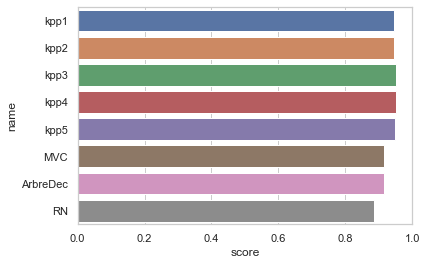

In [187]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

# Conclusion

A partir de cette analyse on voit bien que le model de kpp avec (k=4) et le plus adapté au problème.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 11 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP